# Graph basics

- What is a graph?
- Applications
- Creation of an undirected graph from a python dictionary.

In [1]:
import os
import sys
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from data_loader import LoadNetworkX, LoadGraphTool
from data_visual import VisualizeNetworkX, VisualizeGraphTool


(ipykernel_launcher.py:5142): Gtk-WARNING **: 23:04:20.998: Locale not supported by C library.
	Using the fallback 'C' locale.
objc[5142]: Class GNotificationCenterDelegate is implemented in both /Users/brinkley97/opt/anaconda3/envs/graphbreeding_rpy2/lib/libgio-2.0.0.dylib (0x1b7b54bc0) and /usr/local/Cellar/glib/2.80.4/lib/libgio-2.0.0.dylib (0x1c5ac86b0). One of the two will be used. Which one is undefined.


## What is a graph?

- Formally, a graph is described as a way of encoding pairwise relationships among a set of objects: it consists of a collection $ V $ of vertices (also called nodes, $ N $) and a collection $ E $ of edges (also called links, $ L $), each of which joins two of the nodes [1]. 

$$

G = (V, E)

$$

- Graphs can be directed or undirected.

In [2]:
# Simple graph using dictionary (also called an adjacency list)
graph1 = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['C', 'E']
}

graph2 = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['D'],
    'D': ['A']
}

graph3 = {
    1: [2, 3],
    2: [1, 4, 5],
    3: [1, 6],
    4: [2, 5],
    5: [2, 4, 6],
    6: [3, 5]
}


# Print the graph
for node, neighbors in graph1.items():
    print(f"{node} -> {neighbors}")

print()

for node, neighbors in graph2.items():
    print(f"{node} -> {neighbors}")

print()

for node, neighbors in graph3.items():
    print(f"{node} -> {neighbors}")

A -> ['B', 'C']
B -> ['A', 'D', 'E']
C -> ['A', 'F']
D -> ['B', 'E']
E -> ['B', 'D', 'F']
F -> ['C', 'E']

A -> ['B', 'C']
B -> ['C']
C -> ['D']
D -> ['A']

1 -> [2, 3]
2 -> [1, 4, 5]
3 -> [1, 6]
4 -> [2, 5]
5 -> [2, 4, 6]
6 -> [3, 5]


In [3]:
nx_graph_class = LoadNetworkX()
nx_graph_visual = VisualizeNetworkX()

In [4]:
nx_graph1 = nx_graph_class.dict_to_graph(graph1)
nx_graph2 = nx_graph_class.dict_to_graph(graph2)
nx_graph3 = nx_graph_class.dict_to_graph(graph3)

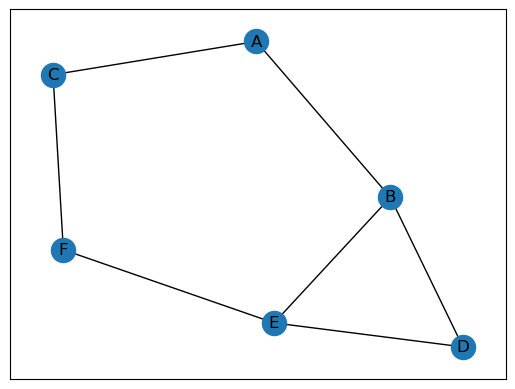

In [5]:
nx_graph_visual.visualize(nx_graph1)

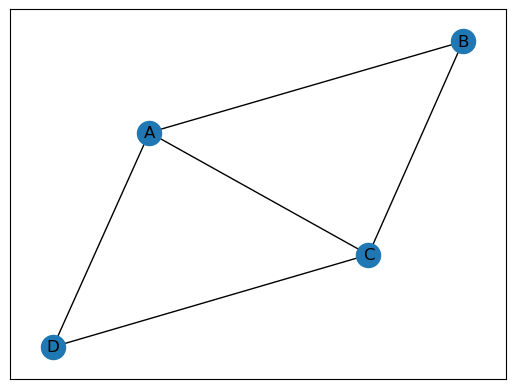

In [6]:
nx_graph_visual.visualize(nx_graph2)

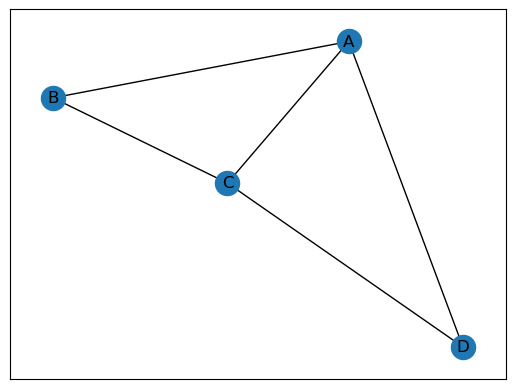

In [7]:
nx_graph_visual.visualize(nx_graph2)

## Implement with graph-tool

In [8]:
gt_graph_class = LoadGraphTool()
gt_graph_visual = VisualizeGraphTool()

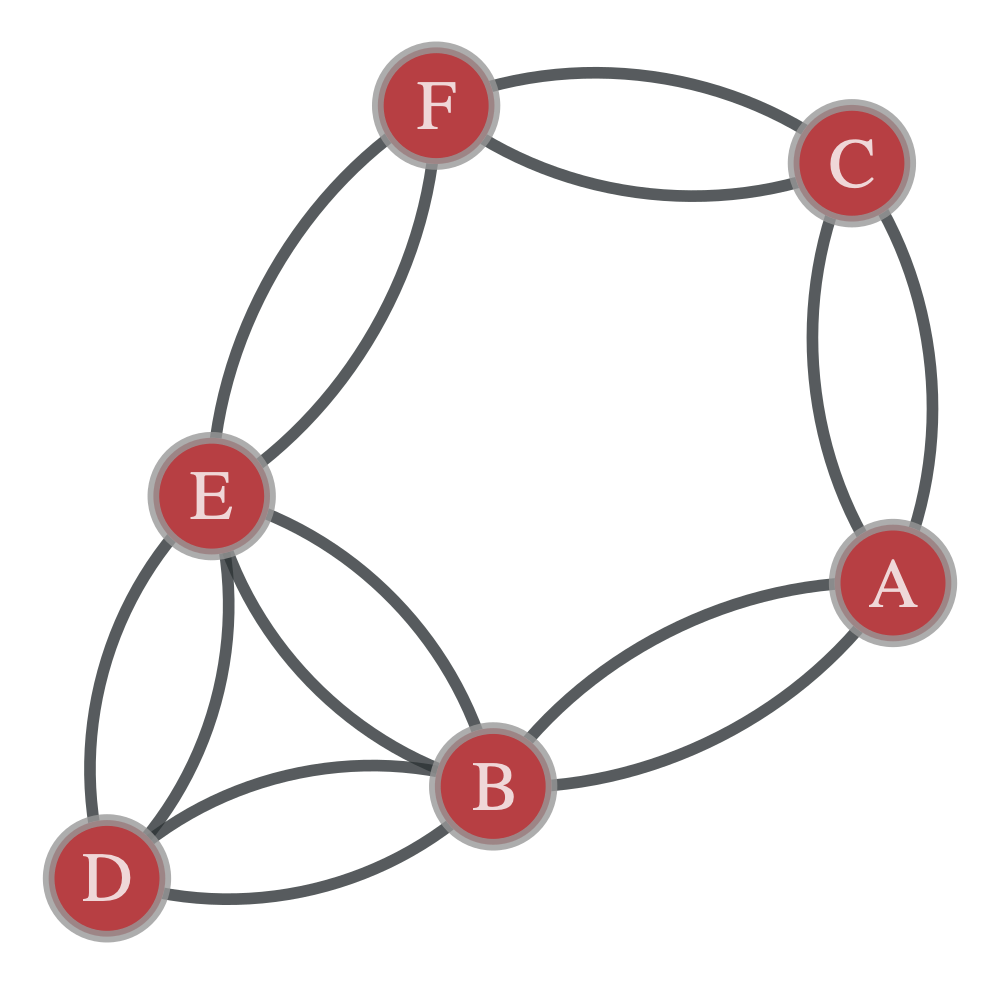

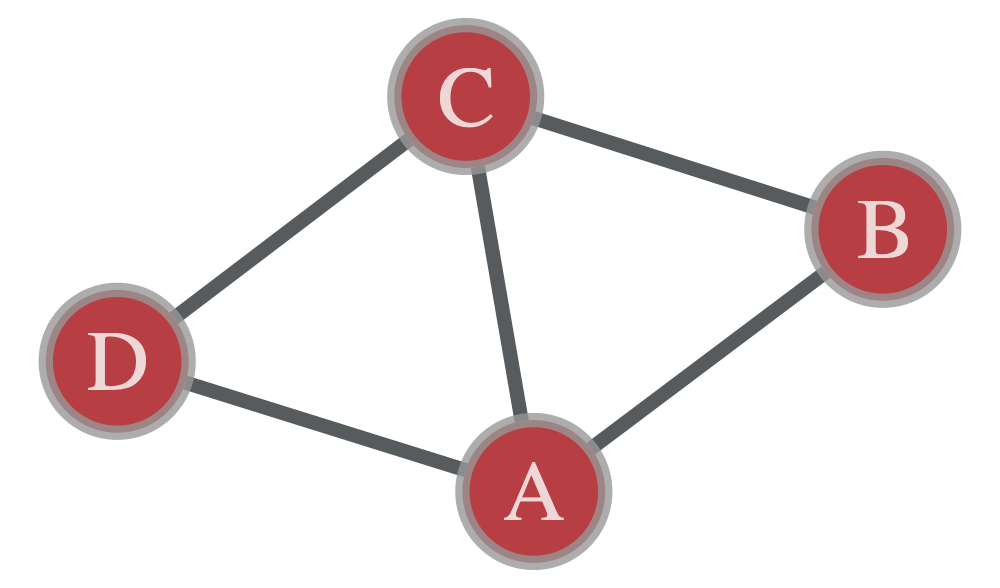

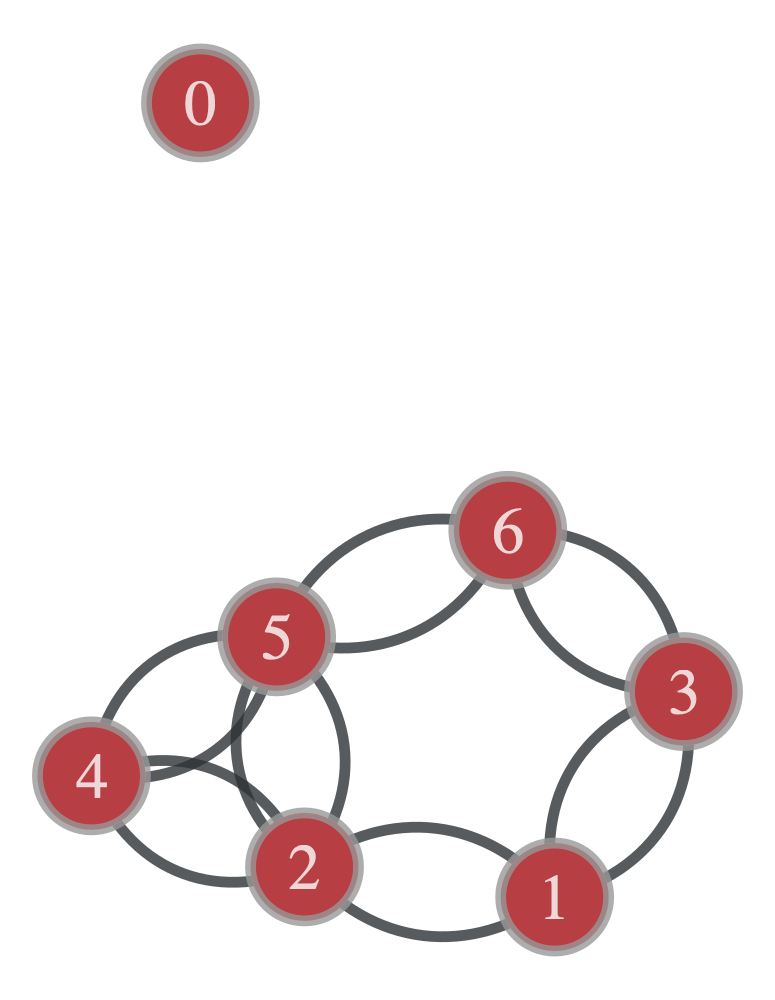

In [10]:
gt_graph1 = gt_graph_class.dict_to_graph(graph1, directed=False)
gt_graph2 = gt_graph_class.dict_to_graph(graph2, directed=False)
gt_graph3 = gt_graph_class.dict_to_graph(graph3, directed=False, integer_node_ids=True)
gt_graph_visual.visualize(gt_graph1)
gt_graph_visual.visualize(gt_graph2)
gt_graph_visual.visualize(gt_graph3)

# References

1. BOOK: Algorithm Design by Kleinberg, Jon and Tardos